<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2019/sem_6/student_teacher_dist.png" height="300" width="700"> 
</center>

# <center> R для тервера и матстата. <br>  <br>  Ошибки 1 и 2 рода </center>


---------------

Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2020). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://github.com/FUlyankin/r_probability) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

-----------

In [1]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов
library('rio')  

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

# 1. Ошибки 1 и 2 рода

__Задание 1:__

Харви подкидывает монетку $n$ раз. Получается выборка $X_1, \ldots, X_n$. Он хочет проверить гипотезу $H_0: p = 1$ против $H_a: p < 1$. Для этого он использует критерий: не отвергать гипотезу $H_0$, если $\sum_{i=1}^n X_i = n$.

__а)__ Предположим, что на самом деле $p = 1$. С какой вероятностью гипотеза $H_0$ будет отвергнута? 

$\alpha$ -  ошибку первого рода, вероятность отвергнуть гипотезу, когда она верна

__Решение:__

$$
\alpha = \mathbb{P}(\text{отклонил } H_0 \mid H_0 \text{ верна}) = \mathbb{P}( H_a \mid H_0) = \mathbb{P} \left( \sum_{i=1}^n X_i < n \mid p = 1\right) = 0
$$

__б)__ Пусть $ 0 < p < 1$. Выписать мощность критерия, как функцию от $n$ и $p$. 

__Решение:__

$$
\beta = \mathbb{P}(\text{не отклонил } H_0 \mid H_0 \text{ не верна}) = \mathbb{P}(H_0 \mid H_a ) = \mathbb{P} \left( \sum_{i=1}^n X_i = n \mid p < 1\right) = p^n
$$

Мощность $1 - \beta = 1 - p^n \to 1 $ при $n \to \infty$, такие критерии называют __состоятельными__ 

__Задание 2:__

__а)__ Величины $X_1$ и $X_2$ независимы и равномерны на отрезке $[0; a]$. Есть две гипотезы, $H_0: a = 1$
и $H_a: a = 2$. Мальвина отвергает $H_0$ в том случае, если $X_1 + X_2 > 1.5$. Найдите вероятность
ошибок первого и второго рода.

__Решение:__ 

$$
\alpha = \mathbb{P}(\text{отклонил } H_0 \mid H_0 \text{ верна}) = \mathbb{P}( H_a \mid H_0) = \mathbb{P} \left( X_2 > 1.5 - X_1  \mid a = 1 \right) = 0.125
$$

$$
\beta = \mathbb{P}(\text{не отклонил } H_0 \mid H_0 \text{ не верна}) = \mathbb{P}(H_0 \mid H_a ) = \mathbb{P} \left( X_2 \le 1.5 - X_1  \mid a = 2 \right) = 1 - 0.28125
$$

__б)__ Мальвина отвергает $H_0$ в том случае, если $X_1 + X_2 > c$. Найдите вероятность
ошибок первого и второго рода. Найти зависимость ошибок от $c$

$$
\alpha = \mathbb{P}(\text{отклонил } H_0 \mid H_0 \text{ верна}) = \mathbb{P}( H_a \mid H_0) = \mathbb{P} \left( X_2 > c - X_1  \mid a = 1 \right) = \frac{(1 - c)^2}{2}
$$

$$
\beta = \mathbb{P}(\text{не отклонил } H_0 \mid H_0 \text{ не верна}) = \mathbb{P}(H_0 \mid H_a ) = \mathbb{P} \left( X_2 \le c - X_1  \mid a = 2 \right) = 1 - \frac{(2-c)^2}{8}
$$

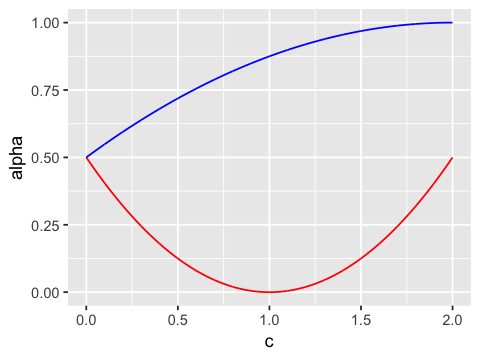

In [2]:
c = seq(0,2, 0.001)
alpha = (1-c)**2/2
beta = 1 - (2 - c)**2/8

df = data.frame(c=c, alpha=alpha, beta=beta)
ggplot(data=df, aes(x=c)) + 
    geom_line(aes(y=alpha), color='red') + 
    geom_line(aes(y=beta), color='blue')


# 2. Держи свой уровень значимости в узде! 


<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_7/6.2%20presa%20-%20bootstrap%2C%20LR/losos.jpg" width="600"> 
</center>

- В 2012 году ряд авторов получил шнобелевскую премию по нейробиологии

- Нужно было протестировать аппарат МРТ, обычно для этого берут шарик с маслом и сканируют его 

<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_7/6.2%20presa%20-%20bootstrap%2C%20LR/mrt.jpg" width="400"> 
</center>

- Скучно, купили мёртвого лосося

- Стали показывать ему фотки людей

- Задача показать, что в голове лосося нет мозговой активности 

- Аппарат МРТ возвращает кучу данных. Один объект - воксель. Для исследования активности мозга в целом, надо провести множественное тестирование гипотез относительно каждого вокселя.

- Оказалось, что у лосося есть рекация в мозгу на людей, написали [статью](http://prefrontal.org/files/posters/Bennett-Salmon-2009.pdf)

## Проверка гипотезы: 

__Уровень значимости:__  $P(\text{отвергнуть} H_0 \mid H_0 \text{верна}) = \alpha$ 

__Выборка:__ $X_1, \ldots, X_n \sim iid \hspace{1mm} F_X(x, \theta)$

__Нулевая гипотеза:__ $H_0 : \theta = \theta_0 $ 

__Альтернатива:__ $H_1 : \theta \ne \theta_0 $ 

__Статистика:__ $T(X_1, \ldots, X_n)$

Если $p$-значение $< \alpha$, гипотеза отвергается 

## Две гипотезы 

- Гипотеза сразу о двух параметрах 

- Всё усложняется: можно ошибиться в обеих гипотезах, ошибиться только в первой или только во второй

- Накопление вероятности ошибки первого рода 

$$
P(\text{ошибочно отвергнуть } H_0 ) = P(\text{ошибочно отвергнуть хотя бы одну из гипотез}) \le \\
\le P(\text{ошибка в первой}) + P(\text{ошибка во второй}) = \alpha + \alpha = 2\alpha
$$

-------------

__Задание 3:__ 

Жизнь исследователя Винни-Пуха прекрасна. Наблюдений много, гипотеза о равенстве ожиданий верна, а наблюдения — нормальны. 

А именно, величины $X_1$, ..., $X_{n}$ независимы и нормальны $N(0;1)$, величины $Y_1$, ..., $Y_n$ независимы и нормальны $N(0;2)$. И пусть $n_x=100$ и $n_y=200$.

Винни-Пух правда этого ничего не знает, потому что у него в голове опилки, и тестирует сначала гипотезу о равенстве дисперсий двух выборок на уровне значимости $5\%$.

__а)__ Проведите $10^6$ экспериментов, то есть $10^6$ раз попробуйте за Винни-Пуха проверить гипотезу. Хорошо бы $10^8$, но оттестируйте сначала свой код на $10^6$. 

Постройте гистограмму распределения тестовой статистики о равенстве дисперсий. В скольки процентах случаев гипотеза о равенстве дисперсий отвергнута? 

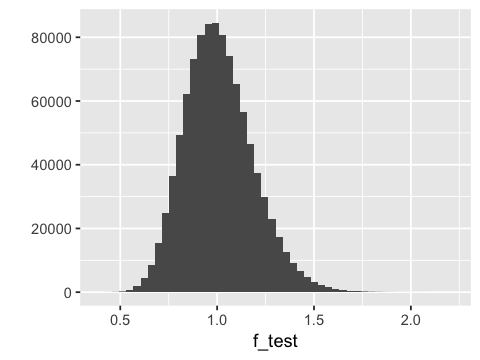

In [3]:
n_obs = 10**6

# включаем логику 
# mu_hat ~ N(0, s2/n)
nx = 100
ny = 200

xbar = rnorm(n_obs, mean = 0, sd = sqrt(1/nx))
ybar = rnorm(n_obs, mean = 0, sd = sqrt(2/ny))

xvar = rchisq(n_obs, df = nx - 1)*1/(nx - 1)
yvar = rchisq(n_obs, df = ny - 1)*1/(ny - 1)

f_test = xvar/yvar
qplot(f_test, bins=50)

In [13]:
fr = qf(1 - 0.05/2, df1 = nx - 1, df2 = ny - 1)
fl = qf(0.05/2, df1 = nx - 1, df2 = ny - 1)
f_obs = xvar/yvar

mean((f_obs > fr)|(f_obs < fl))

[1] 0.050267

__б)__ Если гипотеза о равенстве дисперсий не отвергается, то Винни использует $t$-статистику для проверки гипотезы о равенстве ожиданий при равенстве дисперсий. 

Для тех экспериментов, в которых гипотеза о равенстве дисперсий не отверглась, проверьте гипотезу о равенстве ожиданий на уровне значимости $5\%$. 

Постройте гистограмму распределения $t$-статистики. В скольки процентах случаев гипотеза о равенстве ожиданий отвергнута?

In [15]:
subset = (f_obs < fr)&(f_obs > fl)

t = (xbar - ybar)/sqrt(xvar/nx + yvar/ny)

tl = qt(0.05/2, df=nx+ny-2)
tr = -1*tl

t_obs = t[subset]

mean((t_obs > tr)|(t_obs < tl))

[1] 0.08994633

__в)__ Словами объясните, почему нехорошо сначала тестировать на равенство дисперсий, а потом на равенство средних при равных дисперсиях, если на первом шаге гипотеза $H_0$ не отверглась. 

In [ ]:
# :3

-------------

## Рецепт лечения 

- Будем проверять каждую из двух гипотез на уровне значимости $\frac{\alpha}{2}$

- Если гипотез $K$, то каждую проверяем на уровне $\frac{\alpha}{K}$

- Такой подход называется __поправкой Бонферрони__

## Разрешение парадокса о лососе

- Если ввести поправку Бонферрони, мёртвый лосось остаётся мёртвым

- Реальный вклад в науку, анализ работ по нйробиологии до 2010 года показал, что окло 40% не используют поправку при множественном тестировании гипотез

- После публикации количество статей, где его не используют упало до 10%

__Задание 4:__  

Говорят, Джордж Р.Р. Мартин, автор цикла "Песнь Льда и Пламени", истребляет Старков: чаще убивает персонажей, относящихся к этому дому, чем персонажей других домов. В таблице ниже приведено количество персонажей, относящихся к тому или иному дому, упомянутых за первые $4$ книги, а так же количество погибших персонажей.

| Дом | Упомянутые персонажи | Погибшие персонажи |
|-----|---------------------|------|
|House Stark	| 72 | 18 |
|House Lannister | 49 | 11 |
|House Greyjoy | 41 | 12 |
|Night's Watch |105 | 41 |


Данные взяты из [датасета по ссылке.](https://www.kaggle.com/mylesoneill/game-of-thrones) Нужно проверить гипотезу об этом на $5\%$ уровне значимости. 

### Формализация задачи:

Нам нужно проверить гипотезу о том, что доля смертей среди старков совпадает со всеми остальными долями против альтернативы, что хотя бы в одной из ситуаций смертность в доме Старков больше:

\begin{equation*}
\begin{aligned} 
H_0: p_1 = p_2 \\
H_1: p_1 > p_2 
\end{aligned}
\end{equation*}

Протестируем все гипотезы без коррекции на множественное тестирование, а потом введём её. 

In [16]:
n_st = 72 
m_st = 18

n_lan = 49
m_lan = 11

n_gr = 41
m_gr = 12 

n_nw = 105
m_nw = 41 

alpha = 0.05

Закодим тест для проверки гипотезы о равенстве долей в виде двух функций. Одна будет считать значение статистики, вторая находить `p_value`. 

In [17]:
proportions_diff_zstat = function(n1, m1, n2, m2){ 
    p1 = m1/n1
    p2 = m2/n2
    P = (p1*n1 + p2*n2)/(n1 + n2)
    z_stat = (p1 - p2)/sqrt(P * (1-P) * (1/n1 + 1/n2))
    return(z_stat)
}


proportions_diff_ztest = function(z_stat, alternative = 'two-sided'){
    if(alternative == 'two-sided'){
        return(2 * (1 - pnorm(np.abs(z_stat))))
    }
    
    if(alternative == 'less'){
        return(pnorm(z_stat))
    }
    
    if(alternative == 'greater'){
        return(1 - pnorm(z_stat))
    }
}

Проверяем три гипотезы!

In [18]:
# Для всех трёх случаев гипотеза о рпвенстве долей не отвергается. 
proportions_diff_ztest(proportions_diff_zstat(n_st, m_st, n_gr, m_gr),'greater')

proportions_diff_ztest(proportions_diff_zstat(n_st, m_st, n_lan, m_lan),'greater')

proportions_diff_ztest(proportions_diff_zstat(n_st, m_st, n_nw, m_nw),'greater')

[1] 0.6893569

[1] 0.3734671

[1] 0.9742641

Чтобы ввести коррекцию Бонферони, будем сравнивать с $\frac{\alpha}{3}$. 

In [19]:
pvalues = rep(0,3)
pvalues[1] = proportions_diff_ztest(proportions_diff_zstat(n_st, m_st, n_gr, m_gr),'greater')
pvalues[2] = proportions_diff_ztest(proportions_diff_zstat(n_st, m_st, n_lan, m_lan),'greater')
pvalues[3] = proportions_diff_ztest(proportions_diff_zstat(n_st, m_st, n_nw, m_nw),'greater')

pvalues > 0.05/3 # не отвергается 

[1] TRUE TRUE TRUE

В чём минус такой поправки? Выше мы выписали неравенство 

$$
P(\text{ошибочно отвергнуть } H_0 ) = P(\text{ошибочно отвергнуть хотя бы одну из гипотез}) \le \\
\le P(\text{ошибка в первой}) + P(\text{ошибка во второй}) = \alpha + \alpha = 2\alpha.
$$

В нём фигурировало две гипотезы. Если бы мы захотели бы по-честному выписать равенство, нужно было бы по формуле включений-исключений отнять вероятность пересечения событий. Если гипотез нужно проверить очень много, формула включений-исключений получается огромной. Мы в нашем неравенстве пользуемся только первым её членом. Получается, что реальный уровень значимости, на котором мы проверяем гипотезу оказывается намного меньше, чем заявленный нами $\alpha$. В идеале нам бы хотелось, чтобы вероятность совершить хотя бы одну ошибку первого рода была в точности равна $\alpha$.

__Ещё раз, ещё раз:__ При использовании метода Бонферрони эта вероятность ограничивается гораздо более низкой величиной, чем$\alpha$. Это плохо, потому что перестраховываясь в отношении ошибки первого рода, мы неизбежно совершаем больше ошибок второго рода, то есть мощность такой статистической процедуры снижается.

## Другие поправки 

- Поправку Бонферрони очень просто применять, но у такой процедуры низкая мощность 

- Поправка Бонферрони берёт $\alpha_i$ одинаковыми

- Можно улучшить процедуру, если брать $\alpha_i$ разными 

## Нисходящие методы 

- Отсортируем полученные p-значения 

$$
p_{(1)} \le p_{(2)} \le \ldots \le p_{(m)}
$$
- Если $p_{(1)} \ge \alpha_1$, не отвергаем все нулевые гипотезы, иначе отвергаем $H_{(1)}$ и продолжаем 

- Если $p_{(2)} \ge \alpha_2$, не отвергаем все нулевые гипотезы, иначе отвергаем $H_{(2)}$ и продолжаем 

- Делаем так, пока не закончатся гипотезы

- Нисходящая процедура, так как движемся по убыванию значимости

## Метод Холма 

Если взять уровни значимости 

$$\alpha_1 = \frac{\alpha}{m}, \alpha_2 = \frac{\alpha}{m-1}, \ldots, \alpha_i = \frac{\alpha}{m-i+1}, \ldots, \alpha_m = \alpha$$ 
мы получим __метод холма.__ 

In [20]:
sort(pvalues)

[1] 0.3734671 0.6893569 0.9742641

In [21]:
seq(3,1,by=-1)
alpha/seq(3,1,by=-1)

[1] 3 2 1

[1] 0.01666667 0.02500000 0.05000000

In [22]:
sort(pvalues) > alpha/seq(3,1,by=-1) # гипотеза не отвергается 

[1] TRUE TRUE TRUE

## Восходящие методы 

- В поправках выше мы контролировали вероятность групповой ошибки, то есть вероятность совершить хотя бы одну ошибку первого рода 

- Когда проверяется слишком большое количество гипотез, можно допустить какое-то число ошибок первого рода ради повышения мощности процедуры, это позволит отвергнуть больше неверных гипотез 


## Восходящие vs нисходящие

| $\mbox{ }$                 | число верных $H_i$ | число неверных $H_i$ |
|----------------------------|--------------------|----------------------|
|число не отвергнутых $H_i$  |    U               |   T                  |
|число отвернутых $H_i$      |    V               |   S                  |

* Нисходящие процедуры минимизируют $$P(V > 0)$$ 
* Восходящие процедуры минимизируют долю ложных отклонений 

$$E \left(\frac{V}{\max(V + S, 1)} \right)$$

## Восходящие методы 

- Отсортируем полученные p-значения 

$$
p_{(1)} \le p_{(2)} \le \ldots \le p_{(m)}
$$

- Если $p_{(m)} \le \alpha_m$, тогда все нулевые гипотезы отвергаются, иначе $H_m$ не отвергается и процедура продолжается

- Если $p_{(m-1)} \le \alpha_{m-1}$, тогда все оставшиеся гипотезы отвергаются, иначе $H_{m-1}$ тоже не отвергаетмя и мы продолжаем процедуру

- Делаем так, пока не закончатся гипотезы

- Восходящая процедура, так как движемся по возростанию значимости, она помогает отвергать больше гипотез

Если для одних и тех же значений $\alpha_i$ построить восходящую и нисходящую процедуры, то восходящая процедура всегда будет отвергать не меньше гипотез, чем нисходящая.

## Метод Бенджамини-Хохберга

Если взять уровни значимости 

$$\alpha_1 = \frac{\alpha}{m}, \ldots, \alpha_i = \frac{i \cdot \alpha}{m}, \ldots, \alpha_m = \alpha$$ 
мы получим __метод Бенджамини-Хохберга.__  Тут в отличие от метода Холма уровни значимости возрастают по Гиперболе, а не линейно. 

## Встроенная в R функция
 
В R есть [встроенная функция,](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/p.adjust.html) позвоялющая сделать коррекцию на множественное тестирование гипотез

In [23]:
p.adjust(c(0.01, 0.02, 0.07), "bonferroni")

[1] 0.03 0.06 0.21

In [24]:
p.adjust(c(0.01, 0.02, 0.07), "holm")

[1] 0.03 0.04 0.07

In [25]:
p.adjust(c(0.01,,0.02, 0.03), "hochberg")

[1] 0.03 0.03 0.03

* В пакете есть и другие методы коррекции